In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact_manual
import pandas as pd
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.optimizers import Adagrad
from keras.models import Model
from keras.layers import Input
from keras.layers import concatenate, add

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [5]:
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

# 正規劃資料

In [6]:
x_train = (x_train - x_train.min())/(x_train.max() - x_train.min())
x_test = (x_test - x_test.min())/(x_test.max() - x_test.min())

In [7]:
x = Input(shape=(784,))

# Function API

In [8]:
f_11 = Dense(20, activation='selu')
f_12 = Dense(30, activation='selu')
f_13 = Dense(20, activation='selu')
f_14 = Dense(15, activation='selu')

f_21 = Dense(10, activation='relu')
f_22 = Dense(10, activation='relu')
f_23 = Dense(15, activation='relu')


f_31 = Dense(10, activation='relu')
f_32 = Dense(10, activation='relu')

f_41 = Dense(10, activation='relu')
f_51 = Dense(10, activation='softmax')

In [9]:
t_11=f_11(x)
t_12=f_12(x)
t_13=f_13(x)
t_14=f_14(x)

t_21=f_22(t_12)
a_1 = concatenate([t_11,t_13])
t_22=f_21(a_1)
a_2 = concatenate([t_12,t_14])
t_23=f_23(a_2)


a_3 = concatenate([t_21,t_22])
t_31=f_31(a_3)
a_4 =concatenate([t_21,t_22,t_23])
t_32=f_32(a_4)

a_5 = concatenate([t_31,t_32])
t_41=f_41(a_5)

y =f_51(t_41)

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
model_fork = Model(x, y)
model_fork.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 30)           23550       input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 20)           15700       input_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 20)           15700       input_1[0][0]                    
__________________________________________________________________________________________________
dense_4 (D

In [11]:
model_fork.compile(loss='binary_crossentropy',optimizer=Adagrad(lr=0.1),metrics=['accuracy'])

In [12]:
model=model_fork.fit(x_train, y_train, batch_size=100, epochs=20,verbose =1,validation_data = (x_test,y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 16s 270us/step - loss: 0.1454 - acc: 0.9536 - val_loss: 0.0493 - val_acc: 0.9844
Epoch 2/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.0356 - acc: 0.9891 - val_loss: 0.0280 - val_acc: 0.9911
Epoch 3/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.0252 - acc: 0.9922 - val_loss: 0.0242 - val_acc: 0.9924
Epoch 4/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.0196 - acc: 0.9940 - val_loss: 0.0228 - val_acc: 0.9931
Epoch 5/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.0163 - acc: 0.9949 - val_loss: 0.0229 - val_acc: 0.9931
Epoch 6/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.0136 - acc: 0.9957 - val_loss: 0.0208 - val_acc: 0.9938
Epoch 7/20
60000/60000 [==============================] - 3s 54us/step - loss:

# loss and accuracy

In [13]:
score_fork = model_fork.evaluate(x_test, y_test, batch_size=1000)
print('loss:',score_fork[0] )
print('正確率:',score_fork[1])

10000/10000 [==============================] - 0s 28us/step
loss: 0.024903869535773993
正確率: 0.9946999967098236


# 畫圖

<function matplotlib.pyplot.show(*args, **kw)>

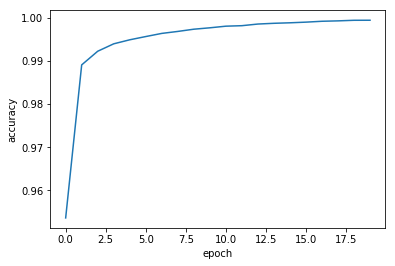

In [15]:
plt.plot(model.history['acc'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show